# Analysis Data Kamus Alay dan Abusive

# Import Library

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
import statistics as stat
import csv
import re


# Data Preparation

## Load Data

Load data **`database tweet konten`** with column **text** and **label** data yang sudah di bersihkan

In [101]:
connection = sqlite3.connect('database/dbtweet.db')
sql = connection.cursor()

db_tweet_content = "SELECT * FROM tweet_alay"
df = pd.read_sql_query(db_tweet_content, connection)
df

# df = pd.read_csv('csv/data.csv', encoding='latin-1')
# df

,id,tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,52677,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,52678,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,52679,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,52680,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,52681,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,65841,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,65842,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,65843,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,65844,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [293]:
# 1. jumlah data yang pakai (13.169)
# 2. datanya darimana (twitter/kaggle)
# 3. jumlah labelnya (14: id,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong)
# 4. rentang waktu pengambilan data ()

In [102]:
def clean_text(text):
    text = text.replace(",","")
    return text

In [103]:
df['length_of_tweet'] = df['tweet'].apply(lambda x: len(x))

In [104]:
def normalize_column(values):
    min_values = min(values)
    max_values = max(values)
    
    new_values = []
    for value in values:
        new_value = (value - min_values) / (max_values - min_values)
        new_values.append(new_value)
    return new_values

In [ ]:
df['normalized_length_of_tweet']

Terlebih dahulu kita mengecek data yang akan kita proses sebelum dilakukan analisis

## Cek data 5 teratas dan terbawah

In [106]:
# 5 teratas
df.head()

,id,tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,length_of_tweet
0,52677,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,138
1,52678,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,120
2,52679,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,254
3,52680,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,75
4,52681,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,89


In [107]:
# 5 terbawah
df.tail()

,id,tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,length_of_tweet
13164,65841,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,61
13165,65842,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,28
13166,65843,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,62
13167,65844,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,135
13168,65845,"USER Mana situ ngasih("": itu cuma foto ya kuti...",1,1,1,0,0,0,0,0,1,1,0,0,53


## Cek jumlah kolom dan total data

Data yang diolah memiliki 15 kolom dan total data 13169

In [108]:
df.shape

(13169, 15)

## Cek total duplikat data

Total data yang duplikat sejumlah 0

In [109]:
df.loc[df.duplicated(keep=False)].sort_values('tweet')

,id,tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,length_of_tweet


Menghilangkan data yang duplikat

In [110]:
df.duplicated().sum()

0

## Cek Missing Values

Jalankan perintah di bawah untuk mendeteksi missing values.

In [111]:
df.isna().sum()

id                 0
tweet              0
HS                 0
Abusive            0
HS_Individual      0
HS_Group           0
HS_Religion        0
HS_Race            0
HS_Physical        0
HS_Gender          0
HS_Other           0
HS_Weak            0
HS_Moderate        0
HS_Strong          0
length_of_tweet    0
dtype: int64

Jalankan perintah untuk melihat persentase missing values dari setiap kolom. 

Terlihat pada setiap kolom memiliki persentase 0. Ini menandakan data kita aman dari missing values

In [112]:
df.isna().sum()

id                 0
tweet              0
HS                 0
Abusive            0
HS_Individual      0
HS_Group           0
HS_Religion        0
HS_Race            0
HS_Physical        0
HS_Gender          0
HS_Other           0
HS_Weak            0
HS_Moderate        0
HS_Strong          0
length_of_tweet    0
dtype: int64

Cek kondisi data terakhir

## Perkecil semua kolom tweet

In [113]:

df["tweet"] = df["tweet"].str.lower()


In [114]:
df

,id,tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,length_of_tweet
0,52677,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,138
1,52678,rt user: user siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,120
2,52679,"41. kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,254
3,52680,user user aku itu aku\n\nku tau matamu sipit t...,0,0,0,0,0,0,0,0,0,0,0,0,75
4,52681,user user kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,65841,user jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,61
13165,65842,user kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,28
13166,65843,user hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,62
13167,65844,user user user user bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,135


In [ ]:
# 1. Sentiment apa yang paling banyak (proporsi labels)
# 2. jumlah kata per row
# 3. Untuk masing masing label, 10 Kata apa yang paling sering muncul.
# 4. Apakah ada tweet yang duplicated, tapi beda label.

## Buat kolom baru 

Cek 5 data teratas lagi. Terlihat sekarang sudah ada kolom "total_word" yang berisi masing-masing panjang kata dari setiap teks.

In [115]:
df['total_word'] = df['tweet'].apply(lambda sent: len(sent.split()))

In [116]:
df['tweet'] = df['tweet'].apply(lambda x: re.sub("'", "", x))

In [117]:
kata_abusive={}
kamus_abusive = pd.read_csv("csv/abusive.csv")
kata_abusive = kamus_abusive["ABUSIVE"] # ambil field abusive
kata_abusive = {fruit : fruit for fruit in kata_abusive}
kata_abusive

{'alay': 'alay',
 'ampas': 'ampas',
 'buta': 'buta',
 'keparat': 'keparat',
 'anjing': 'anjing',
 'anjir': 'anjir',
 'babi': 'babi',
 'bacot': 'bacot',
 'bajingan': 'bajingan',
 'banci': 'banci',
 'bandot': 'bandot',
 'buaya': 'buaya',
 'bangkai': 'bangkai',
 'bangsat': 'bangsat',
 'bego': 'bego',
 'bejat': 'bejat',
 'bencong': 'bencong',
 'berak': 'berak',
 'bisu': 'bisu',
 'celeng': 'celeng',
 'jancuk': 'jancuk',
 'bodoh': 'bodoh',
 'berengsek': 'berengsek',
 'budek': 'budek',
 'burik': 'burik',
 'jamban': 'jamban',
 'cocot': 'cocot',
 'congor': 'congor',
 'culun': 'culun',
 'cupu': 'cupu',
 'dongok': 'dongok',
 'dungu': 'dungu',
 'edan': 'edan',
 'tai': 'tai',
 'ngewe': 'ngewe',
 'geblek': 'geblek',
 'gembel': 'gembel',
 'gila': 'gila',
 'goblok': 'goblok',
 'iblis': 'iblis',
 'idiot': 'idiot',
 'jablay': 'jablay',
 'jembud': 'jembud',
 'jembut': 'jembut',
 'jijik': 'jijik',
 'kacrut': 'kacrut',
 'kafir': 'kafir',
 'modar': 'modar',
 'kampang': 'kampang',
 'kampret': 'kampret',
 'ka

In [118]:
# my_dictalay = {}
# with open('csv/new_kamusalay.csv', 'r') as file_kamus_alay:
#  reader = csv.reader(file_kamus_alay)
#  for row in reader:
#      key = row[0]
#      value = row[1]
#      my_dictalay[key]

# kata_alay = {key.replace(',', '='): value.replace(',', ':') for key, value in my_dictalay.items()}
# kata_alay

my_dictalay = {}
with open('csv/new_kamusalay.csv', 'r') as file_kamus_alay:
 reader = csv.reader(file_kamus_alay)
 for row in reader:
     key = row[0]
     value = row[1]
     my_dictalay[key] = value

kata_alay = {key.replace(',', '='): value.replace(',', ':') for key, value in my_dictalay.items()}
kata_alay


{'anakjakartaasikasik': 'anak jakarta asyik asyik',
 'pakcikdahtua': 'pak cik sudah tua',
 'pakcikmudalagi': 'pak cik muda lagi',
 't3tapjokowi': 'tetap jokowi',
 '3x': 'tiga kali',
 'aamiin': 'amin',
 'aamiinn': 'amin',
 'aamin': 'amin',
 'aammiin': 'amin',
 'abis': 'habis',
 'abisin': 'habiskan',
 'acau': 'kacau',
 'achok': 'ahok',
 'ad': 'ada',
 'adek': 'adik',
 'adl': 'adalah',
 'adlah': 'adalah',
 'adlh': 'adalah',
 'ado': 'ada',
 'aduhh': 'aduh',
 'aer': 'air',
 'afdol': 'afdal',
 'agamaataualqur': 'agama alquran',
 'agm': 'agama',
 'agma': 'agama',
 'ahaha': 'haha',
 'ahahaha': 'haha',
 'ahehehehe': 'hehe',
 'ahir': 'akhir',
 'ahirnya': 'akhirnya',
 'ahk': 'ahok',
 'ahlamdulillah': 'alhamdulillah',
 'ahli2': 'para ahli',
 'ahlusunnah': 'ahlus sunah',
 'ahmaddani': 'ahmad dhani',
 'aho': 'ahok',
 'ahoax': 'ahok',
 'ahoaxx': 'ahok',
 'ahog': 'ahok',
 'ahokataudjarot': 'ahok djarot',
 'ahokbebanijokowi': 'ahok beban jokowi',
 'ahokbtp': 'ahok basuki tjahaja purnama',
 'ahokditolakw

In [119]:
def find_alay(header):
    alay_words = []
    for word in header.split():
        if word in kata_alay:
            header = header.replace(word, kata_alay[word])
            alay_words.append(word)
    return ' '.join(alay_words)


In [120]:
def find_abusive(header):
    abusive_words = []
    for word in header.split():
        if word in kata_abusive:
            header = header.replace(word, kata_abusive[word])
            abusive_words.append(word)
    return ' '.join(abusive_words)




In [121]:
def panjang(header):
    if header:
        return len(header.replace(",", ""))
    else:
        return 0

In [165]:
def lebeling(total_ka, total_a):
    if total_ka == 0 and total_a == 0:
        return 'Netral'
    elif total_ka > 0 and total_a > 0:
        return 'Annoying'
    elif total_ka > 0 and total_a == 0:
        return 'Abusive'
    elif total_ka == 0 and total_a > 0:
        return 'Alay'

Membuat Field baru Kalimat_Alay untuk menampung kata alay yang keluar di field tweet

In [123]:

df['Kalimat_Alay'] = df['tweet'].apply(find_alay)

Membuat Field baru Kalimat_Abusive untuk menampung kata abusive yang keluar di field tweet

In [124]:
df['Kalimat_Abusive'] = df['tweet'].apply(find_abusive)

Membuat Field baru Total_KA untuk menampung jumlah kalimat abusive

In [125]:
df['Total_KA'] = df['Kalimat_Abusive'].apply(panjang)

Membuat Field baru Total_A untuk menampung jumlah kalimat alay

In [126]:
df['Total_A'] = df['Kalimat_Alay'].apply(panjang)

Membuat Field baru Total_Char untuk menampung jumlah karakter field tweet

In [127]:
df['total_char'] = df['tweet'].apply(len)

Membuat Field baru Total_Word untuk menampung jumlah kalimat field tweet

In [128]:
df['total_word'] = df['tweet'].apply(lambda sent: len(sent.split()))

Membuat Field baru Type untuk menampung type kalimat dari tweet tersebut
- Netral = jika tweet tersebut tidak mengandukng kata alay ataupun kata abusive
- Alay = jika tweet tersebut mengandung kata alay saja
- Abusive = jika tweet tersebut mengandung kalimat abusive saja
- Anoying = jika tweet tersebut mengandung kata abusive dan alay

In [166]:
df['Type'] = df.apply(lambda x: lebeling(x['Total_KA'], x['Total_A']), axis=1)

Check data yang sudah di tambahkan field baru

In [167]:
# Cek data teratas
df
# df.to_csv('dataxxxx.csv', index=False)

,id,tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,...,HS_Moderate,HS_Strong,length_of_tweet,total_word,Kalimat_Alay,Kalimat_Abusive,Total_KA,Total_A,total_char,Type
0,52677,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,...,0,0,138,25,disaat loe yg elo,bego,4,17,137,Annoying
1,52678,rt user: user siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,...,0,0,120,21,user ngasih noh,sarap,5,15,119,Annoying
2,52679,"41. kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,...,0,0,254,37,ninggalkan orangtuaku,,0,21,254,Alay
3,52680,user user aku itu aku\n\nku tau matamu sipit t...,0,0,0,0,0,0,0,0,...,0,0,75,14,user user diliat,sipit,5,16,74,Annoying
4,52681,user user kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,...,1,0,89,14,user user kapir udah keliatan dongok hahahah,cebong dongok,13,44,88,Annoying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,65841,user jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,...,0,0,61,10,user ngomong lu yg sekate2 anjyng,congor,6,33,60,Annoying
13165,65842,user kasur mana enak kunyuk,0,1,0,0,0,0,0,0,...,0,0,28,5,user,kunyuk,6,4,27,Annoying
13166,65843,user hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,...,0,0,62,9,user huft,bisu,4,9,61,Annoying
13167,65844,user user user user bom yang real mudah terdet...,0,0,0,0,0,0,0,0,...,0,0,135,22,user user user user,,0,19,134,Alay


In [131]:
splited_tweet = df['tweet'].apply(lambda sent: sent.split())

In [132]:
splited_tweet

0        [-, disaat, semua, cowok, berusaha, melacak, p...
1        [rt, user:, user, siapa, yang, telat, ngasih, ...
2        [41., kadang, aku, berfikir,, kenapa, aku, tet...
3        [user, user, aku, itu, aku\n\nku, tau, matamu,...
4        [user, user, kaum, cebong, kapir, udah, keliat...
                               ...                        
13164    [user, jangan, asal, ngomong, ndasmu., congor,...
13165                    [user, kasur, mana, enak, kunyuk]
13166    [user, hati, hati, bisu, :(, .g\n\nlagi, bosan...
13167    [user, user, user, user, bom, yang, real, muda...
13168    [user, mana, situ, ngasih(":, itu, cuma, foto,...
Name: tweet, Length: 13169, dtype: object

In [169]:
netral_words = {}
anoying_words = {}
toxic_words = {}
alay_words = {}

for lab, twe in zip(df['Type'], splited_tweet):
    if lab == 'Netral':
        for word in twe:
            try:
                netral_words[word] += 1
            except KeyError:
                netral_words[word] = 1
    if lab == 'Annoying':
        for word in twe:
            try:
                anoying_words[word] += 1
            except KeyError:
                anoying_words[word] = 1
    if lab == 'Toxic':
        for word in twe:
            try:
                toxic_words[word] += 1
            except KeyError:
                toxic_words[word] = 1
    if lab == 'Alay':
        for word in twe:
            try:
                alay_words[word] += 1
            except KeyError:
                alay_words[word] = 1

In [896]:
kamus_negative = ['sombong']
kamus_positive = []

In [ ]:
contoh_text = df.loc[df.label == 'negative'].iloc[0].values

In [ ]:
score = 0
for word in contoh_text[0].split():
    if word in kamus_negative:
        score = score-1
    elif word in kamus_positive:
        score = score+1
    else:
        score = score+0
    

In [643]:
sorted(positive_words.items(), key = lambda x:x[1], reverse=True)[:10]

[]

In [ ]:
sorted(negative_words.items(), key = lambda x:x[1], reverse=True)[:10]

In [ ]:
sorted(neutral_words.items(), key = lambda x:x[1], reverse=True)[:10]

In [412]:
import numpy as np
import seaborn as sns

In [136]:
np.quantile(df['total_char'], 0.01)

16.0

In [137]:
df.loc[df.total_char<449].mean()

C:\Users\Inggit Ganasih\AppData\Local\Temp\ipykernel_17656\1414136590.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.loc[df.total_char<449].mean()


id                 59261.238913
HS                     0.422312
Abusive                0.382898
HS_Individual          0.271491
HS_Group               0.150820
HS_Religion            0.060222
HS_Race                0.042983
HS_Physical            0.024529
HS_Gender              0.023238
HS_Other               0.284022
HS_Weak                0.256911
HS_Moderate            0.129481
HS_Strong              0.035920
length_of_tweet      114.168818
total_word            17.280301
Total_KA               2.841054
Total_A               20.143606
total_char           113.624620
dtype: float64

In [138]:
df.describe()

,id,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,length_of_tweet,total_word,Total_KA,Total_A,total_char
count,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000
mean,59261.000000,0.422280,0.382945,0.271471,0.150809,0.060217,0.042980,0.024527,0.023236,0.284000,0.256891,0.129471,0.035918,114.202749,17.281722,2.840838,20.147088,113.658516
std,3801.707182,0.493941,0.486123,0.444735,0.357876,0.237898,0.202819,0.154685,0.150659,0.450954,0.436935,0.335733,0.186092,69.075620,10.231275,4.312222,18.992129,69.155335
min,52677.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,4.000000
25%,55969.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.000000,9.000000,0.000000,7.000000,58.000000
50%,59261.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,15.000000,0.000000,15.000000,100.000000
75%,62553.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,152.000000,23.000000,5.000000,28.000000,151.000000
max,65845.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,561.000000,52.000000,100.000000,145.000000,560.000000


In [ ]:
sns.distplot(df.total_word)

In [59]:
df['splitted_tweet'] = [tweet.split(" ") for tweet in df['tweet']]

In [60]:
count_of_words = {}
for splitted_tweet in df['splitted_tweet']:
    for word in splitted_tweet:
        try:
            count_of_words[word] += 1
        except KeyError:
            count_of_words[word] = 1
#     break

In [61]:
for x in count_of_words.items():
    print(x)
    break

('-', 231)


In [ ]:
df.groupby('label').total_word.sum().plot(kind='bar')

In [ ]:
df.groupby('label').total_word.mean().plot(kind='bar')

In [ ]:
df.groupby('label').total_word.median().plot(kind='bar')

# Analyze

Descriptive Analytic dalam kasus teks sering disebut Exploratory Data Analysis (EDA). EDA secara sederhana bisa dimaknai sebagai proses untuk memahami data sebelum diproses untuk tujuan tertentu atau langkah selanjutnya.

Apakah proses akan berhenti dalam tahap EDA atau tidak tergantung Problem Definition yang sudah kita tentukan sebelumnya.

Berdasarkan variabel (kolom) yang diproses, EDA bisa dibagi sebagai berikut:


*   Univariat Analysis: Analisis dengan melibatkan satu variabel
*   Bivariat Analysis: Analisis dengan melibatkan dua variabel:
*   Multivariat Analysis: Analisis dengan melibatkan lebih dari dua variabel. 

Dari jenis analisis di atas tidak semua harus dilakukan. Lagi-lagi tergantung Problem Definition dan karaktistik data yang kita miliki.



## Univariate Analysis

### Descriptive Statistic

Untuk mengeksplorasi data kita bisa menggunakan ilmu Statistika Deskriptif. Terkait Statistik Deskriptif bisa kita pelajari lebih dalam pada chapter selanjutnya.

Menurut Statistika Deskriptif, ada 3 cara untuk mendeskripsikan data:

* Measures of Central Tendency
   * Mean
   * Median
   * Mode
* Measures of Spread
   * Range
   * Quartile dan Interquartile Range
   * Variance
   * Standard deviasi
* Measures to Describe Shape of Distribution
   * Skewness
   * Kurtosis

#### Measures of Central Tendency
Merupakan suatu cara untuk mendeskripsikan posisi tengah dari distribusi frekuensi pada suatu kelompok

##### Mean

Digunakan untuk mencari rata-rata dari kolom/variabel yang bertipe numerical.

Pada hasil berikut mean "total_char" memiliki rata-rata panjang karakter 113.6, sedangkan "total_word" memiliki rata-rata 17.2 kata.

In [ ]:
df = df.drop_duplicates()

In [63]:
print(df['total_word'].mean())
print(df['total_char'].mean())

17.281722226440884
113.6585162123168


In [64]:
df[['total_word','total_char']].mean()

total_word     17.281722
total_char    113.658516
dtype: float64

##### Median

Pada hasil berikut median "total_char" memiliki nilai tengah panjang karakter 100.0, sedangkan "total_word" memiliki nilai tengah 15.0 kata.

In [65]:
df[['total_word','total_char']].median()

total_word     15.0
total_char    100.0
dtype: float64

##### Mode

Digunakan untuk mencari frekuensi data yang paling sering muncul.

Pada hasil berikut mode "total_char" memiliki frekuensi yang paling sering muncul yakni panjang karakter 254, sedangkan "total_word" memiliki frekuensi yang paling sering muncul 11 kata.

In [66]:
df[['total_word','total_char']].mode()

,total_word,total_char
0,11,254


#### Measures of Spread
Merupakan suatu cara untuk mendeskripsikan seberapa menyebar data yang ada.

##### Range

Digunakan untuk mencari perbedaan antara nilai terbesar dengan nilai terkecil pada data.

Pada hasil berikut range "total_char" memiliki perbedaan sebesar 564, sedangkan "total_word" memiliki perbedaan sebesar 109 kata.

In [67]:
df[['total_word','total_char']].max() - df[['total_word','total_char']].min()

total_word     51
total_char    556
dtype: int64

##### Variance

Digunakan untuk mengukur seberapa menyebar data yang ada dari mean-nya. Jika nilai variance dari suatu variabel/kolom lebih besar atau lebih kecil mean, maka nilai dari suatu variabel/kolom tersebut menjauhi mean.

Nilai variance dari "total_char" sebesar "4771.4" menjauhi (lebih dari) dari nilai mean dari "total_char" sebesar "189.614561".

Nilai variance dari "total_word" sebesar "104.6" menjauhi (lebih dari) dari nilai mean dari "total_word" sebesar "33.0".

In [68]:
df[['total_char', 'total_word']].var()

total_char    4782.460309
total_word     104.678980
dtype: float64

##### Standard Deviation

Digunakan untuk mengukur penyebaran observasi dalam kumpulan data relatif terhadap rata-ratanya. Jika nilai standard deviation dari suatu variabel/kolom lebih besar atau lebih kecil mean, maka data dari suatu variabel/kolom tersebut menjauhi mean.

Nilai standard deviation dari "total_char" sebesar "14600.7" menjauhi (lebih dari) dari nilai mean dari "total_char" sebesar "189.614561".

Nilai standard deviation dari "total_word" sebesar "446.9" menjauhi (lebih dari) dari nilai mean dari "total_word" sebesar "33.0".

In [69]:
df[['total_char', 'total_word']].std()

total_char    69.155335
total_word    10.231275
dtype: float64

#### Measures of Describe Shape of Distribution
Merupakan suatu cara untuk mendeskripsikan distribusi data berdasarkan suatu grafik.

##### Skewness
Merupakan suatu cara untuk mengukur ketidaksimetrisan suatu distribusi nilai.

*   Apabila nilai skewness = 0, maka menunjukkan data berdistribusi normal.
*   Apabila nilai skewness < 0, maka menunjukkan skewness bernilai negatif.
*   Apabila nilai skewness > 0, maka menunjukkan skewness bernilai positif.

Jika kita melihat hasil di bawah nilai skewness pada "total_char" dan "total_word" bernilai positif.

In [70]:
df[['total_char', 'total_word']].skew()

total_char    0.693492
total_word    0.786788
dtype: float64

##### Kurtosis
Merupakan suatu cara untuk menunjukan derajat keruncingan, semakin besar nilai kurtosis maka kurva semakin runcing.

Kurtosis memiliki kondisi sebagai berikut:

*   Kurtosis yang memiliki nilai 3 berarti memiliki Distribusi Normal
*   Jika nilai Kurtosis kurang dari 3, dikatakan bersifat playkurtik, yang berarti cenderung menghasilkan lebih sedikit nilai outlier.
*   Jika nilai kurtosis lebih besar dari 3, dikatakan leptokurtik, yang berarti cenderung menghasilkan lebih besar nilai outlier.

Jika kita melihat hasil di bawah nilai kurtosis pada "total_char" dan "total_word" bernilai kurang dari 3 yang berarti memiliki sifat "playkurtik".

In [ ]:
# """
# Data berupa pemakaian air dalam 6 bulan terakhir di kota jakarta
# pemakaian_pdam = [pemakaian_pdam_bulan_1, pemakaian_pdam_bulan_2, pemakaian_pdam_bulan_3, pemakaian_pdam_bulan_4, pemakaian_pdam_bulan_5, pemakaian_pdam_bulan_6]

# mean_of_pemakaian_pdam = data[pemakaian_pdam].mean(axis=1)
# median_of_pemakaian_pdam = data[pemakaian_pdam].median(1)
# variance_of_pemakaian = data[pemakaian_pdam].median(1)
# dst..
# """


### Visualization

Selain dengan pendekatan Descriptive Statistic, untuk mengetahui insight melalui Univariate Analysis bisa menggunakan visualisasi. 

#### Pie

Berikut contoh visualisasi Pie Chart untuk melihat persebaran total sentimen per kelasnya.

Berdasarkan gambar di bawah terlihat sentimen terbanyak ada di sentimen positif, selanjutnya sentimen negatif, dan yang terakhir sentimen netral. 

In [472]:
import matplotlib.pyplot as plt

In [651]:
df['Type'].value_counts()

Alay       7222
Anoying    4626
Netral     1000
Abusive     321
Name: Type, dtype: int64

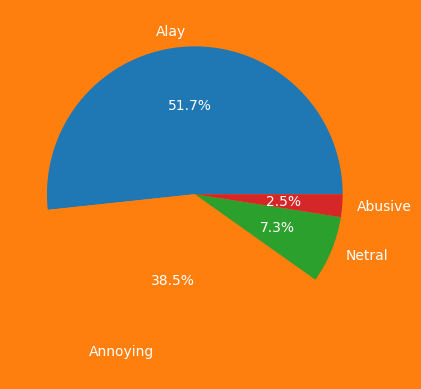

In [176]:
import matplotlib.pyplot as plt

# menghitung jumlah data untuk masing-masing jenis
count = df['Type'].value_counts()

# membuat figure dan mengatur warna latar belakang
fig = plt.figure(facecolor='tan')

# menampilkan diagram lingkaran dengan persentase
ax = fig.add_subplot(111)
ax.pie(count, labels=count.index, autopct='%1.1f%%', textprops={'color': 'white'})

plt.show()


([<matplotlib.patches.Wedge at 0x25bc2392020>,
 [Text(-0.0583599739944744, 1.0984507787950102, 'Alay'),
  Text(-0.27787261267857033, -1.0643245797796768, 'Anoying'),
  Text(1.0188712057040883, -0.4146100169883717, 'Netral'),
  Text(1.0966547111215608, -0.08572306909395111, 'Abusive')])

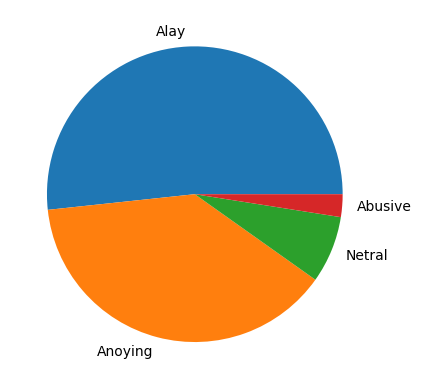

In [71]:
plt.pie(df['Type'].value_counts(), labels=df['Type'].value_counts().index)

#### Histogram

Berikut contoh visualisasi Histogram untuk melihat persebaran jumlah karakter (total_char).

Berdasarkan gambar di bawah terlihat rata-rata panjang karakter dari data teks yang kita miliki ada pada sekitar 100-200 karakter.

In [679]:
sorted(df['total_char'])

[4,
 4,
 4,
 6,
 8,
 8,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,


(array([1.040e+03, 2.296e+03, 2.263e+03, 2.124e+03, 1.797e+03, 8.920e+02,
        6.080e+02, 6.660e+02, 1.178e+03, 2.730e+02, 1.900e+01, 9.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  4.  ,  31.85,  59.7 ,  87.55, 115.4 , 143.25, 171.1 , 198.95,
        226.8 , 254.65, 282.5 , 310.35, 338.2 , 366.05, 393.9 , 421.75,
        449.6 , 477.45, 505.3 , 533.15, 561.  ]),
 <BarContainer object of 20 artists>)

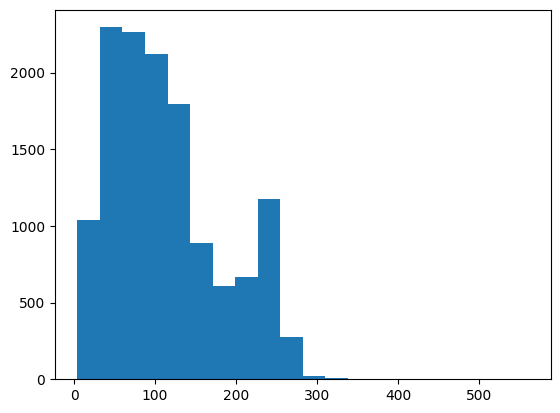

In [680]:
plt.hist(df['total_char'],bins=20)

Berikut contoh visualisasi Histogram untuk melihat persebaran jumlah word (total_word).

Berdasarkan gambar di bawah terlihat rata-rata panjang kata dari data teks yang kita miliki ada pada sekitar 20-40 kata.

(array([ 282., 1414., 1191., 1783., 1050., 1502.,  975., 1201.,  633.,
         659.,  515.,  293.,  502.,  309.,  444.,  162.,  169.,   48.,
          31.,    6.]),
 array([ 1.  ,  3.55,  6.1 ,  8.65, 11.2 , 13.75, 16.3 , 18.85, 21.4 ,
        23.95, 26.5 , 29.05, 31.6 , 34.15, 36.7 , 39.25, 41.8 , 44.35,
        46.9 , 49.45, 52.  ]),
 <BarContainer object of 20 artists>)

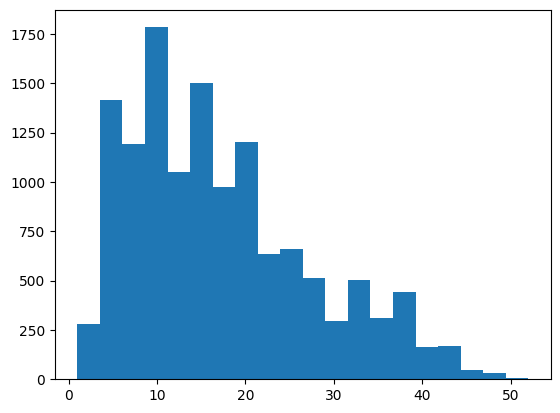

In [681]:
plt.hist(df['total_word'],bins=20)

##### Histogram & Filter Sentiment

Kita bisa memfilter data berdasarkan sentimen setelah itu memvisualisasikannya dalam bentuk Histogram.

Hasilnya:

*   Pada sentimen negatif, mayoritas panjang karakternya 0-200 karakter dan panjang katanya sekitar 50 kata. 
*   Pada sentimen netral, mayoritas panjang karakternya sekitar 100 karakter dan panjang katanya sekitar 25 kata.
*   Pada sentimen positif, mayoritas panjang karakternya 200-400 karakter dan panjang katanya sekitar 30-70 kata.


(array([103., 167., 204., 143., 110.,  88.,  43.,  30.,  38.,  74.]),
 array([  4. ,  29.5,  55. ,  80.5, 106. , 131.5, 157. , 182.5, 208. ,
        233.5, 259. ]),
 <BarContainer object of 10 artists>)

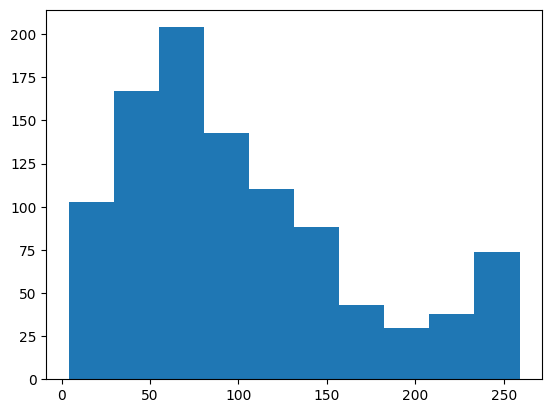

In [684]:
plt.hist(df.loc[df.Type == 'Netral']['total_char'])

(array([1.911e+03, 2.374e+03, 1.337e+03, 7.380e+02, 8.490e+02, 1.100e+01,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 10. ,  65.1, 120.2, 175.3, 230.4, 285.5, 340.6, 395.7, 450.8,
        505.9, 561. ]),
 <BarContainer object of 10 artists>)

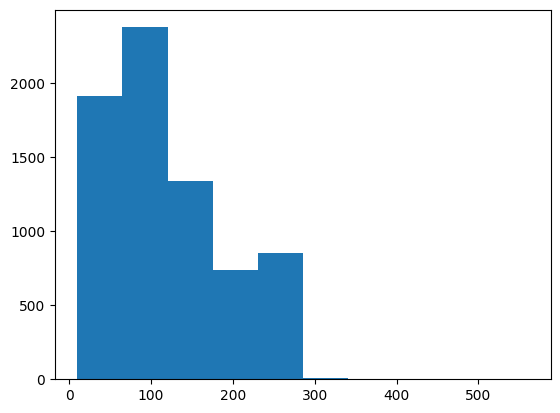

In [685]:
plt.hist(df.loc[df.Type == 'Alay']['total_char'])

(array([57., 62., 57., 52., 28., 10., 21., 32.,  1.,  1.]),
 array([  9. ,  40.7,  72.4, 104.1, 135.8, 167.5, 199.2, 230.9, 262.6,
        294.3, 326. ]),
 <BarContainer object of 10 artists>)

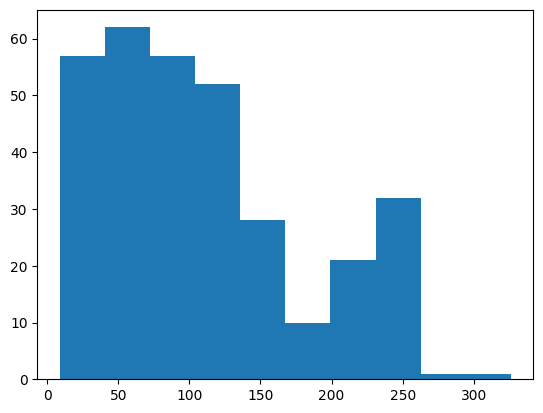

In [686]:
plt.hist(df.loc[df.Type == 'Abusive']['total_char'])

(array([ 874., 1051.,  877.,  738.,  298.,  288.,  434.,   53.,    9.,
           4.]),
 array([ 12. ,  46.7,  81.4, 116.1, 150.8, 185.5, 220.2, 254.9, 289.6,
        324.3, 359. ]),
 <BarContainer object of 10 artists>)

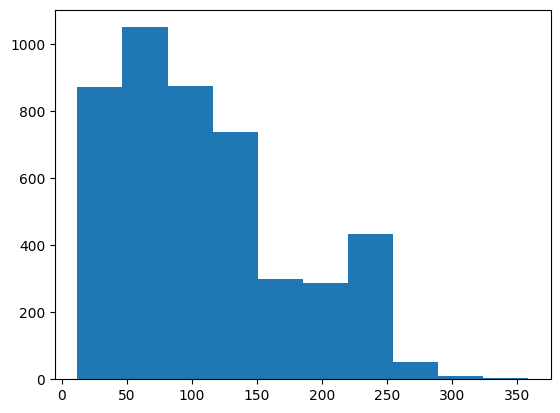

In [687]:
plt.hist(df.loc[df.Type == 'Anoying']['total_char'])

#### Wordcloud

Kita bisa melihat kata yang sering muncul dengan visualisasi wordcloud. Terlihat pada visualisasi di bawah kata yang sering muncul adalah "dan", "dengan", "karena", "di", "sini", "tempat", "nya".

In [ ]:
pip install stylecloud

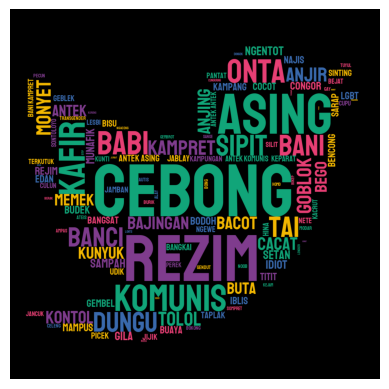

In [163]:
from PIL import Image
import stylecloud
import matplotlib.pyplot as plt
%matplotlib inline
# stylecloud.gen_stylecloud(file_path = "2009-01-20-inaugural-address.txt", icon_name= "fab fa-twitter")
df['Kalimat_Abusive'] = df['Kalimat_Abusive'].str.replace(',', '')
full_text_abusive = " ".join(df['Kalimat_Abusive'])
full_text_abusive = full_text_abusive.replace(',,', '')
stylecloud.gen_stylecloud(text=full_text_abusive, icon_name= "fab fa-twitter", background_color='rgba(0, 0, 0, 0)', size=1000)

# Open the image and convert it to RGBA
image = Image.open('stylecloud.png').convert('RGBA')

# Extract the color channels
r, g, b, a = image.split()

# Create a new image with a solid black background
background = Image.new('RGBA', image.size, (0, 0, 0, 255))

# Paste the color channels onto the black background
background.paste(image, mask=a)

# Set the background color to transparent
background.putalpha(0)

# Convert the image to a numpy array and show it
np_image = np.array(background)



plt.imshow(image)
plt.axis('off')
plt.show()




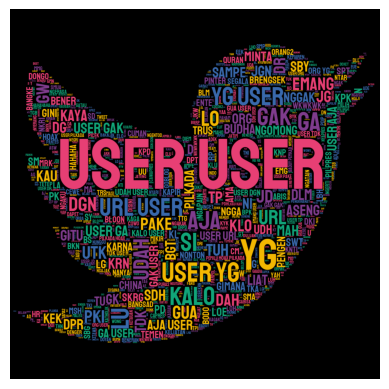

In [158]:
df['Kalimat_Alay'] = df['Kalimat_Alay'].str.replace(',', '')
full_text_alay = " ".join(df['Kalimat_Alay'])
full_text_alay = full_text_alay.replace(',,', '')
stylecloud.gen_stylecloud(text=full_text_alay, icon_name= "fab fa-twitter", background_color='rgba(0, 0, 0, 0)', size=1000)


plt.imshow(plt.imread('stylecloud.png'))
plt.axis('off')
plt.show()




In [ ]:
pip install wordcloud

In [74]:
from wordcloud import WordCloud

In [95]:
# Visualisasi Wordcloud
df['Kalimat_Abusive'] = df['Kalimat_Abusive'].str.replace(',', '')
full_text_abusive = " ".join(df['Kalimat_Abusive'])
full_text_abusive = full_text_abusive.replace(',,', '')
wordcloud_abusive = WordCloud(width=800, height=800, background_color='white').generate(full_text_abusive)
full_text_abusive

'Ini kalimat abusive. Ini juga kalimat abusive!'

In [76]:
df['Kalimat_Alay'] = df['Kalimat_Alay'].str.replace(',', '')
# Visualisasi Wordcloud
full_text_alay = " ".join(df['Kalimat_Alay'])
wordcloud_alay = WordCloud().generate(full_text_alay)
full_text_alay

counts = df['Kalimat_Alay'].str.split(expand=True).stack().value_counts()
counts.to_csv('nama_file.csv', index=True, header=['word'])
counts.head()

user    15470
yg       2914
url       819
gak       716
ga        714
dtype: int64

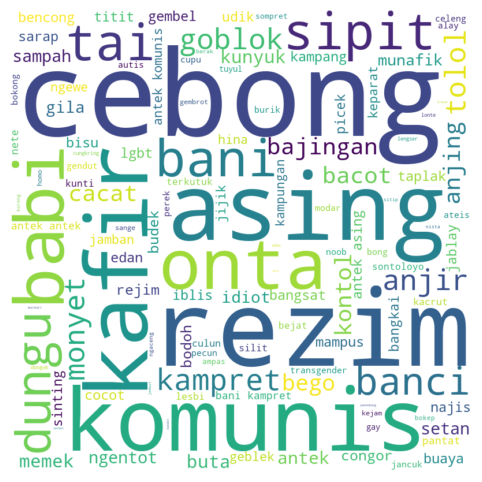

In [77]:
plt.figure(figsize=(8, 6)) # mengatur ukuran gambar menjadi 8 x 6 inchi
plt.imshow(wordcloud_abusive, interpolation='bilinear')
plt.axis("off")
plt.show()

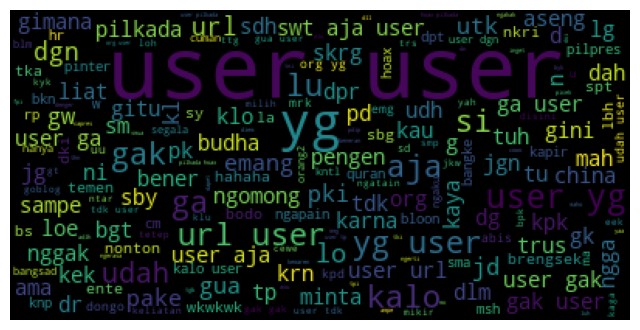

In [78]:
plt.close() 
plt.figure(figsize=(8, 6)) # mengatur ukuran gambar menjadi 8 x 6 inchi
plt.imshow(wordcloud_alay)
plt.axis("off")
plt.show()

##### Wordcloud & Filter Sentiment

Kita bisa memfilter data berdasarkan sentimen setelah itu memvisualisasikannya dalam bentuk Worcloud.

Hasilnya:

*   Pada sentimen negatif, kata yang sering muncul adalah "nya", "yang", dan "dan". 
*   Pada sentimen netral, kata yang sering muncul adalah "dan", "yang", "di", "untuk", dan "dengan".
*   Pada sentimen positif, kata yang sering muncul adalah "dan", "di", "sini", "tempat", "nya", dan "enak".

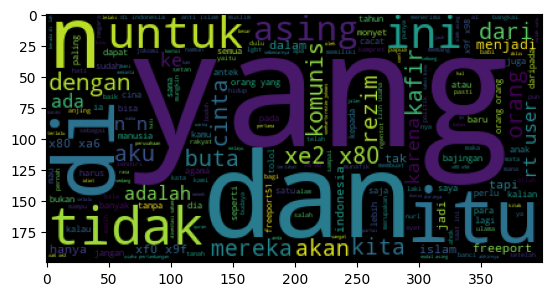

In [79]:
# Visualisasi Wordcloud sentiment negatif
full_text = " ".join(df.loc[df.Type == 'Abusive']['tweet'])
wordcloud = WordCloud().generate(full_text)

plt.imshow(wordcloud)
plt.show()

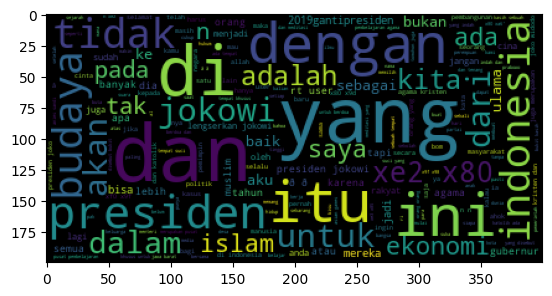

In [688]:
# Visualisasi Wordcloud sentiment neutral

full_text = " ".join(df.loc[df.Type == 'Netral']['tweet'])
wordcloud = WordCloud().generate(full_text)

plt.imshow(wordcloud)
plt.show()

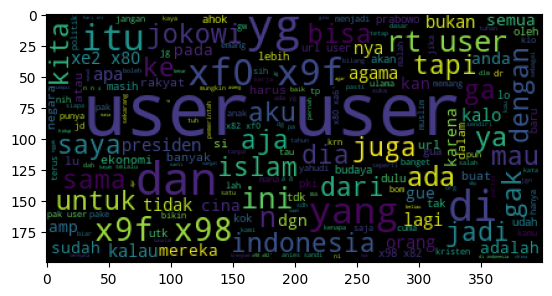

In [690]:
# Visualisasi Wordcloud sentiment positif
full_text = " ".join(df.loc[df.Type == 'Alay']['tweet'])
wordcloud = WordCloud().generate(full_text)

plt.imshow(wordcloud)
plt.show()

# Analisa Korelasi Kata 'Enak' dengan label positive

In [663]:
df['apakah_ada_kata_enak'] = df['tweet'].apply(lambda x: 1 if "saya" in x else 0)

In [ ]:
df['is_label_positive'] = df['label'].apply(lambda x: 1 if x == "positive" else 0)

In [ ]:
df[['apakah_ada_kata_enak', 'is_label_positive']].corr()

In [664]:
df[['tweet']]

,tweet
0,- disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !'
1,rt user: user siapa yang telat ngasih tau elu?edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga'
2,"41. kadang aku berfikir, kenapa aku tetap percaya pada tuhan padahal aku selalu jatuh berkali-kali. kadang aku merasa tuhan itu ninggalkan aku sendirian. ketika orangtuaku berencana berpisah, ketika kakakku lebih memilih jadi kristen. ketika aku anak ter"
3,user user aku itu aku\n\nku tau matamu sipit tapi diliat dari mana itu aku'
4,user user kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah'
...,...
13164,user jangan asal ngomong ndasmu. congor lu yg sekate2 anjyng'
13165,user kasur mana enak kunyuk'
13166,user hati hati bisu :( .g\n\nlagi bosan huft \xf0\x9f\x98\xaa'
13167,user user user user bom yang real mudah terdeteksi bom yang terkubur suatu saat lebih dahsyat ledakannya itulah di sebut revolusi jiwa'


## Bivariate Analysis

### Descriptive Statistic

Untuk melakukan Bivariate Analysis kita bisa mengkombinasikan pendekatan statistik dan visualisasi sama seperti Univariate Analysis.

#### Pearson Correlation
Pearson Correlation mengukur linear dependence antara 2 variabel X dan Y.
Hasilnya berupa angka diantara -1 dan 1, dimana:
- 1: total positive linear correlation,
- 0: no linear correlation, the two variables most likely do not affect each other
- -1: total negative linear correlation.

Pada hasil di bawah, antara "total_word" dan "total_char" memiliki korelasi positif karena mendekati nilai 1:



*   "total_world" -> "total_char": 0.99
*   "total_char" -> "total_world": 0.99



In [80]:
df[['Total_KA','Total_A']].corr()

,Total_KA,Total_A
Total_KA,1.000000,0.085448
Total_A,0.085448,1.000000


### Visualization

#### Scatter

Angka korelasi positif sebelumnya terkonfirmasi dari visualisasi scatter di bawah. Terlihat pola yang dihasilkan linier dari pojok kiri bawah ke pojok kanan atas.

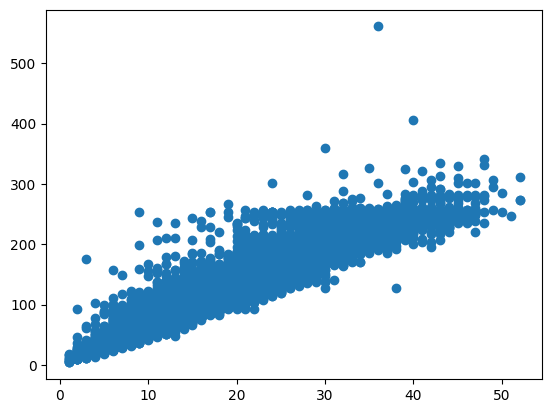

In [693]:
plt.scatter(x=df['total_word'], y=df['total_char'])

#### Bar

##### Total Word + Label

Kita bisa melihat kombinasi visualisasi antara total_word dan label untuk mencari tahu sentimen apa yang memiliki kata yang paling panjang.

Pada visualisasi di bawah sentimen positif memiliki kata yang paling panjang

<BarContainer object of 52 artists>

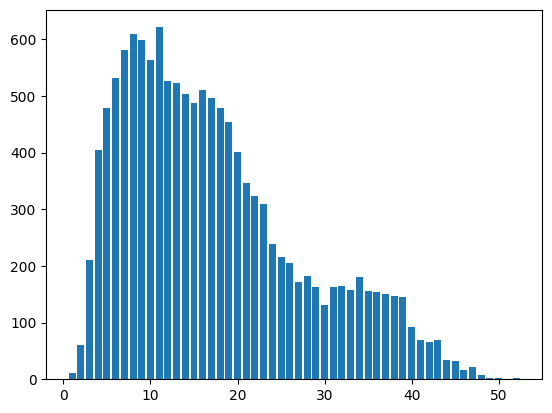

In [694]:
plt.bar(df['total_word'].value_counts().index, df['total_word'].value_counts())

##### Total Char + Label

Kita bisa melihat kombinasi visualisasi antara total_char dan label untuk mencari tahu sentimen apa yang memiliki kata yang paling panjang.

Pada visualisasi di bawah sentimen positif memiliki karakter yang paling panjang

<BarContainer object of 13169 artists>

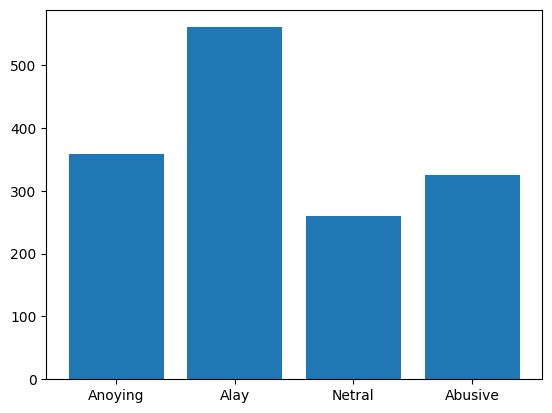

In [909]:
plt.bar(df['Type'], df['total_char'])

# Conclusion

Berdasarkan analisis yang sudah kita lakukan, ada beberapa insight yang bisa kita ambil:

*   Berdasarkan Univariate Analysis:
  *  Dalam Descriptive Statistic menunjukkan data yang kita olah memiliki outlier namun tidak terlalu signifikan
  *  Dalam visualisasi menunjukkan:
      *  Total karakter dan total kata memiliki panjang 100-200 karakter dan 24-40 kata.
      *  Sentimen terbanyak adalah sentimen positif, selanjutnya sentimen negatif, dan yang terakhir sentimen netral.
      *  Total karakter dan kata yang paling banyak adalah sentimen positif yakni 200-400 karakter dan 30-70 kata.
      *  Pada sentimen positif, kata yang sering muncul adalah "dan", "di", "sini", "tempat", "nya", dan "enak".

*   Berdasarkan Bivariate Analysis:
  *  Dalam Descriptive Statistic menunjukkan variabel total karakter dan total kata memiliki korelasi positif. 
  *  Dalam visualisasi menunjukkan:
      *  Variabel total karakter dan total kata terkonfirmasi memiliki korelasi positif
      *  Total karakter dan kata yang paling banyak adalah sentimen positif.